In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/predict-energy-behavior-of-prosumers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-energy-behavior-of-prosumers/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/electricity_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/weather_station_to_county_mapping.csv
/kaggle/input/predict-energy-behavior-of-prosumers/public_timeseries_testing_util.py
/kaggle/input/predict-energy-behavior-of-prosumers/historical_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/county_id_to_name_map.json
/kaggle/input/predict-energy-behavior-of-prosumers/train.csv
/kaggle/input/predict-energy-behavior-of-prosumers/forecast_weather.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/sample_submission.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/client.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/gas_prices.csv
/kaggle/input/predict-energy-behavior-of-prosumers/example_test_files/electricity

In [2]:
import matplotlib.pyplot as plt

# Data Exploration

In this section I am simply exploring the data - making sense of the different data sets, finding patterns, viewing data types, etc.

In [3]:
path = '/kaggle/input/predict-energy-behavior-of-prosumers/'
for file in os.listdir(path):
    if os.path.isfile(path + file):
        if file.endswith("csv"):
            temp_df = pd.read_csv(path + file)
            print(file)
            print(temp_df.head())
            print("-"*100)
        else: print(f"{file} not a csv.\n","-"*100)

client.csv
   product_type  county  eic_count  installed_capacity  is_business  \
0             1       0        108              952.89            0   
1             2       0         17              166.40            0   
2             3       0        688             7207.88            0   
3             0       0          5              400.00            1   
4             1       0         43             1411.00            1   

         date  data_block_id  
0  2021-09-01              2  
1  2021-09-01              2  
2  2021-09-01              2  
3  2021-09-01              2  
4  2021-09-01              2  
----------------------------------------------------------------------------------------------------
gas_prices.csv
  forecast_date  lowest_price_per_mwh  highest_price_per_mwh origin_date  \
0    2021-09-01                 45.23                  46.32  2021-08-31   
1    2021-09-02                 45.62                  46.29  2021-09-01   
2    2021-09-03                 

In [4]:
train = pd.read_csv(path + 'train.csv')
client = pd.read_csv(path + 'client.csv')
train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [5]:
# county, is_business, and product_type make up the unique identifiers (prediction unit)
c = 0
b = 0
p = 1

In [6]:
# Example to visualize what train.csv represents
example = train[
    (train['county']==c)
     & (train['is_business']==b)
    & (train['product_type']==p)
]
example['datetime'] = pd.to_datetime(example['datetime'])
example

/tmp/ipykernel_19/1748400296.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['datetime'] = pd.to_datetime(example['datetime'])


,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
122,0,0,1,1.132,0,2021-09-01 01:00:00,0,122,0
123,0,0,1,77.691,1,2021-09-01 01:00:00,0,123,0
244,0,0,1,0.490,0,2021-09-01 02:00:00,0,244,0
...,...,...,...,...,...,...,...,...,...
2017963,0,0,1,569.301,1,2023-05-31 21:00:00,637,2017963,0
2018092,0,0,1,5.086,0,2023-05-31 22:00:00,637,2018092,0
2018093,0,0,1,577.499,1,2023-05-31 22:00:00,637,2018093,0
2018222,0,0,1,2.921,0,2023-05-31 23:00:00,637,2018222,0


In [7]:
example.dtypes

county                         int64
is_business                    int64
product_type                   int64
target                       float64
is_consumption                 int64
datetime              datetime64[ns]
data_block_id                  int64
row_id                         int64
prediction_unit_id             int64
dtype: object

In [8]:
example_client = client[
    (client['county']==c)
     & (client['is_business']==b)
    & (client['product_type']==p)
]
example_client['date'] = pd.to_datetime(example_client['date'])
example_client

/tmp/ipykernel_19/743026702.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_client['date'] = pd.to_datetime(example_client['date'])


,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.890,0,2021-09-01,2
61,1,0,108,952.890,0,2021-09-02,3
122,1,0,108,952.890,0,2021-09-03,4
183,1,0,108,952.890,0,2021-09-04,5
244,1,0,108,952.890,0,2021-09-05,6
...,...,...,...,...,...,...,...
41591,1,0,508,4968.215,0,2023-05-25,633
41657,1,0,507,4960.215,0,2023-05-26,634
41723,1,0,507,4960.215,0,2023-05-27,635
41789,1,0,508,4964.215,0,2023-05-28,636


In [9]:
print("day:",example['datetime'][0].day)
print("month:",example['datetime'][0].month)
print("year:",example['datetime'][0].year)

day: 1
month: 9
year: 2021


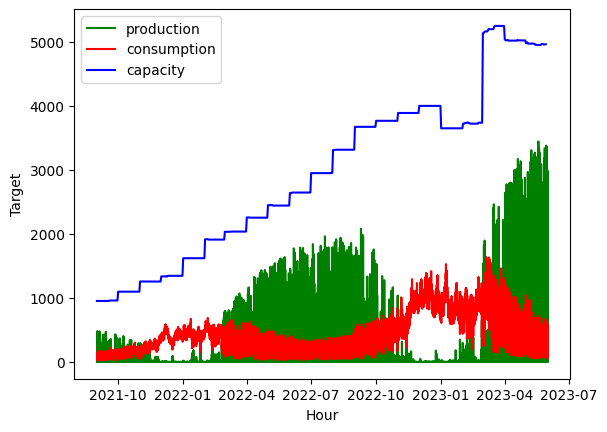

In [10]:
production = example[(example['prediction_unit_id']==0) & (example['is_consumption']==0)]['target']
consumption = example[(example['prediction_unit_id']==0) & (example['is_consumption']==1)]['target']
capacity = example_client['installed_capacity']
cap_date = example_client['date']
time = example[(example['prediction_unit_id']==0) & (example['is_consumption']==0)]['datetime']
#time = [i for i, _ in enumerate(time)]
plt.plot(time, production, label = "production", c = "green")
plt.plot(time, consumption, label = "consumption", c = "red")
plt.plot(cap_date, capacity, label = "capacity", c = "blue")
plt.xlabel("Hour")
plt.ylabel("Target")
plt.legend()